In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import sys; sys.path.insert(0, '..')
from utils import LinearRegDiagnostic

In [13]:
path = "~/Desktop/ISLR_Labs/data/Auto.csv"
data = pd.read_csv(path)

Changing '?' mark to NaN to replace easily

In [14]:
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)
data["horsepower"] = pd.to_numeric(data["horsepower"])
data["origin"] = data["origin"].apply(str)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


a)

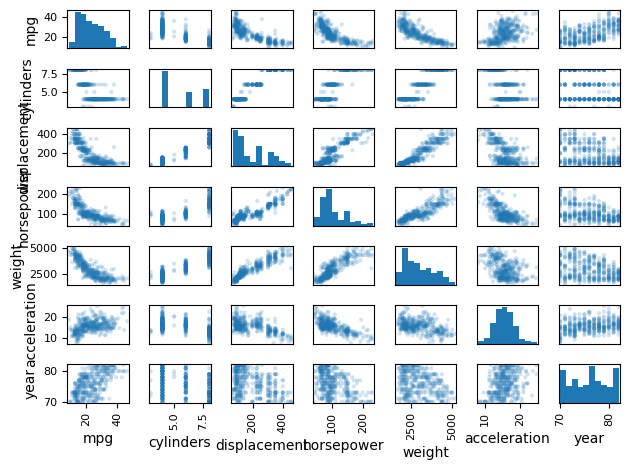

In [16]:
axes = pd.plotting.scatter_matrix(data.iloc[:, :8], alpha=0.2)
plt.tight_layout()

b)

In [17]:
data.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


c)

In [18]:
all_columns = " + ".join(data.columns.difference(["mpg", "name"]))
formula = 'mpg ~ ' + all_columns
results = smf.ols(formula, data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Fri, 05 May 2023   Prob (F-statistic):          1.79e-139
Time:                        15:16:40   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9546      4.677     -3.839   

  i) the p-value of 1.79e-139 for a F-statistic of 224.5. That indicates a strong evidence that there is a relationship between the predictors and the response

 ii) origin, displacement, weight and year are statistically significant as their p-values are below 0.05 or near zero.

iii) if all other predictors are kept constant, after a year the value of mpg will increase in 0.75mpg

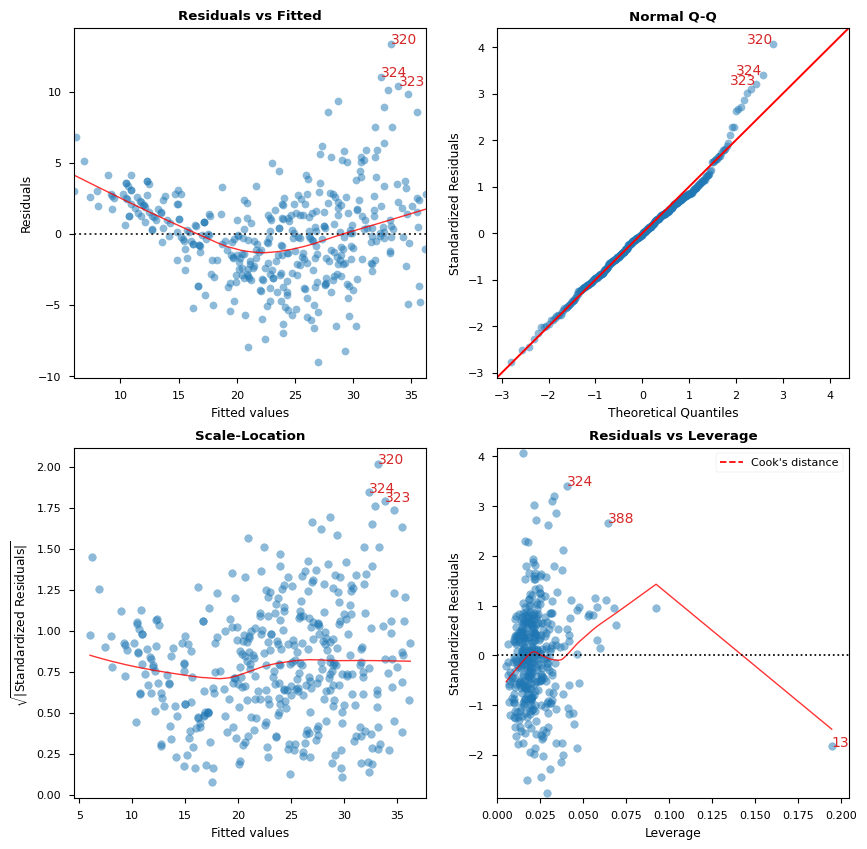

       Features  VIF Factor
8          year        1.30
1   origin[T.2]        1.65
2   origin[T.3]        1.76
3  acceleration        2.63
6    horsepower        9.96
4     cylinders       10.74
7        weight       11.07
5  displacement       22.94
0     Intercept      784.27


In [19]:
cls = LinearRegDiagnostic(results)
vif, fig, ax = cls()
print(vif)

The Residuals vs. Fitted plot suggest that there are some large outliers. Futhermore, that plot suggest a non-linear data, a polynomial plot should provide more information.

The Residuals vs. Leverage plot identified 13 observations with high leverage

d)

In [20]:
all_columns = " + ".join(data.columns.difference(["mpg", "name"]))
formula = 'mpg ~ ' + all_columns + "+ year:acceleration + cylinders:horsepower"
results_interactions = smf.ols(formula, data=data).fit()
print(results_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     254.4
Date:                Fri, 05 May 2023   Prob (F-statistic):          7.97e-162
Time:                        15:16:41   Log-Likelihood:                -961.72
No. Observations:                 392   AIC:                             1945.
Df Residuals:                     381   BIC:                             1989.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               93.5889 

The interacts **year:acceleration** and **cylinders:horsepower** are statistically significant. The $R^2$ metric has increased from 0.824 to 0.870 with these addition

e)

In [21]:
all_columns = " + ".join(data.columns.difference(["mpg", "name"]))
formula = 'mpg ~ ' + all_columns + "+ year:acceleration + I(cylinders^3)"
results_poly = smf.ols(formula, data=data).fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     224.6
Date:                Fri, 05 May 2023   Prob (F-statistic):          5.70e-153
Time:                        15:16:41   Log-Likelihood:                -982.77
No. Observations:                 392   AIC:                             1988.
Df Residuals:                     381   BIC:                             2031.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            81.7158     19.83

In [22]:
all_columns = " + ".join(data.columns.difference(["mpg", "name"]))
formula = 'mpg ~ ' + all_columns + "+ year : acceleration + np.log(cylinders) + np.log(horsepower)"
results_log = smf.ols(formula, data=data).fit()
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     225.1
Date:                Fri, 05 May 2023   Prob (F-statistic):          7.30e-159
Time:                        15:16:41   Log-Likelihood:                -965.89
No. Observations:                 392   AIC:                             1956.
Df Residuals:                     380   BIC:                             2003.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            165.7354     20

Both additions have increased the $R^2$ metric, so both are statistically significant